# Notebook de preparação, treinamento, testes e visualizações
# FAKE NEWS DETECTION

In [1]:
import pandas as pd

### Recuperando os dados a partir do arquivo

In [2]:
df_completo = pd.read_csv('fake_news_fakebrcorpus.csv', sep=';', encoding='utf-8')

### Obtendo uma amostra dos dados

In [3]:
df_completo.head(3)

,Unnamed: 0,texto normalizado,fake,author,link,category,number of tokens,number of types,number of links inside the news,number of verbs,number of subjuntive and imperative verbs,number of nouns,number of adjectives,number of adverbs,number of modal verbs (mainly auxiliary verbs),number of pronouns,percentage of news with speeling errors,emotiveness,diversity
0,0,O Podemos decidiu expulsar o deputado federal...,0,Naira Trindade,http://politica.estadao.com.br/blogs/coluna-do...,politica,168,107,None,24,2,43,5,4,3,7,0.000000,0.134328,0.722973
1,1,"Bolsonaro é um liberal completo, diz president...",0,Marco Rodrigo Almeida,http://www1.folha.uol.com.br/poder/2018/01/194...,politica,1028,474,None,135,2,237,56,45,14,63,0.001156,0.271505,0.547977
2,2,Ministro do STF libera Andrea Neves de prisão ...,0,"Fernando Zuba , Pedro Ângelo E Renan Ramalho",https://g1.globo.com/mg/minas-gerais/noticia/s...,politica,540,232,None,69,0,146,10,20,7,19,0.000000,0.139535,0.487395


### Obtendo informações sobre os campos, seus tipos e as quantidades de dados

In [4]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200 entries, 0 to 7199
Data columns (total 19 columns):
Unnamed: 0                                        7200 non-null int64
texto normalizado                                 7200 non-null object
fake                                              7200 non-null int64
author                                            7174 non-null object
link                                              7200 non-null object
category                                          7200 non-null object
number of tokens                                  7200 non-null int64
number of types                                   7200 non-null int64
number of links inside the news                   7200 non-null object
number of verbs                                   7200 non-null int64
number of subjuntive and imperative verbs         7200 non-null int64
number of nouns                                   7200 non-null int64
number of adjectives                            

### Obtendo os nomes das colunas

In [5]:
features_names = df_completo.columns

### Retirando alguns campos para obter as estatísticas dos dados principais

In [6]:
features_names_filtrado = [feature_n for feature_n in features_names if feature_n not in ['seq','fake','number of types','Unnamed: 0']]

In [7]:
df_completo_filtrado = df_completo[features_names_filtrado]

### Obtendo as estatísticas dos dados

In [8]:
df_completo_filtrado.describe()

,number of tokens,number of verbs,number of subjuntive and imperative verbs,number of nouns,number of adjectives,number of adverbs,number of modal verbs (mainly auxiliary verbs),number of pronouns,percentage of news with speeling errors,emotiveness,diversity
count,7200.000000,7200.00000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000
mean,742.763333,100.76750,4.063194,182.920278,33.154444,30.014444,13.869028,38.758056,0.003065,0.209758,0.577903
std,774.155454,108.03151,5.492677,186.507322,39.702327,37.742105,15.303212,51.759915,0.007780,0.070239,0.126475
min,11.000000,1.00000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.232210
25%,183.000000,26.00000,1.000000,46.000000,7.000000,7.000000,3.000000,8.000000,0.000000,0.162500,0.471088
50%,416.000000,57.00000,2.000000,106.000000,18.000000,15.000000,8.000000,19.000000,0.000579,0.204082,0.577402
75%,1064.250000,141.00000,5.000000,265.000000,45.000000,39.000000,19.000000,49.000000,0.003799,0.251055,0.676276
max,8634.000000,1148.00000,65.000000,2170.000000,532.000000,497.000000,181.000000,720.000000,0.382353,0.750000,1.000000


### Filtrando apenas os dados da categoria política para testes

In [9]:
df_politica = df_completo.loc[df_completo['category']=='politica']

In [10]:
df_politica.shape

(4180, 19)

In [11]:
import seaborn as sns

## Criação de funções para ajudar na análise e no pré-processamento

### Classes para selecionar as colunas tipo texto e numérico para usar no pipeline

In [12]:
from sklearn.base import BaseEstimator, TransformerMixin

class TextSelector(BaseEstimator, TransformerMixin):
    """
    Seleciona uma única coluna do dataframe para realizar transformações adicionais
    Usar em colunas de texto
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.key]
    
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Seleciona uma única coluna do dataframe para realizar transformações adicionais
    Usar em colunas numéricas
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]

### Função para realizar o cross validation k-fold, treina o modelo e exibe as métricas

In [13]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

def classificar_texto(pipe, X_treino, y_treino,isXGB):
    
    kf = StratifiedKFold(n_splits=5,shuffle=True,random_state = 42)
    all_classes_tests = []
    all_predictions = []
    
    for train_index, test_index in kf.split(X_treino, y_treino):
        treino_kf = X_treino.iloc[train_index]
        classe_treino_kf = y_treino.iloc[train_index]
        teste_kf = X_treino.iloc[test_index]
        classe_teste_kf = y_treino.iloc[test_index]
    
        y_pred = []
        predictions = []
    
        if(isXGB == 1):
            pipe.fit(treino_kf, classe_treino_kf)
            y_pred = pipe.predict(teste_kf)
            predictions = [round(value) for value in y_pred]
        else: 
            pipe.fit(treino_kf, classe_treino_kf)
            predictions = pipe.predict(teste_kf)
        
        for predict in predictions:
            all_predictions.append(predict)
            
        for clas_teste in classe_teste_kf:
            all_classes_tests.append(clas_teste)

    # evaluate predictions
    print ("Accuracy:", accuracy_score(all_classes_tests, all_predictions))
    print ("Precision:", precision_score(all_classes_tests, all_predictions))
    print (classification_report(all_classes_tests, all_predictions))
    print (confusion_matrix(all_classes_tests, all_predictions))
    
    

### Função para exibir um gráfico de pareto contendo as palavras com maior frequência

In [14]:
import nltk
from nltk import tokenize
import matplotlib.pyplot as plt
import seaborn as sns

def pareto(texto, coluna_texto, quantidade):

    token_espaco = tokenize.WhitespaceTokenizer()
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    token_frase = token_espaco.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(token_frase)
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                   "Frequência": list(frequencia.values())})
    df_frequencia = df_frequencia.nlargest(columns = "Frequência", n = quantidade)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequencia, x = "Palavra", y = "Frequência", color = 'gray')
    ax.set(ylabel = "Contagem")
    plt.show()    

### Download das bibliotecas do nltk - stopwords e stemmer

In [15]:
import nltk
nltk.download('stopwords')
nltk.download('rslp')
from nltk.stem import SnowballStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\jp\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


### Função que realiza pré-processamento no texto - com stopwords da coleção nltk

In [16]:
from nltk import tokenize
import seaborn as sns
import matplotlib.pyplot as plt
from string import punctuation
import unidecode
import re


def limpeza(texto,coluna):
    stop_words_pt = nltk.corpus.stopwords.words("portuguese")
    stemmer = SnowballStemmer("portuguese")
    #stemmer = nltk.RSLPStemmer()
    
    
    token = tokenize.WordPunctTokenizer()

    pontuacao = list()
    for ponto in punctuation:
        pontuacao.append(ponto)

    pontuacao_stopwords = pontuacao + stop_words_pt
    stopwords_sem_acento = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]

    #Transformando para minusculo, removendo stop words e pontuacao e realizando stemetização    
    
    frase_processada = list()
    for frase in texto[coluna]:
        nova_frase = list()
        ## Tokenizar
        palavras_texto = token.tokenize(frase.lower())
        for palavra in palavras_texto:
            ## Retirar números
            palavra_sem_numero = re.sub('[0-9]', '' , palavra)
            ## Retirar acentuação
            palavra_sem_acento = unidecode.unidecode(palavra_sem_numero)
            ## Retirar stop words
            if ((len(palavra_sem_acento) > 0) and (palavra_sem_acento not in stopwords_sem_acento) and palavra_sem_acento.isalpha()):
                ## Stemização - Obtenção do radical
                palavra_stem = stemmer.stem(palavra_sem_acento)
                ## Retirar as palavras com apenas 1 caracter
                if(len(palavra_stem) > 1):
                    nova_frase.append(palavra_stem)
        frase_processada.append(' '.join(nova_frase))
    
    return frase_processada

### Função que realiza pré-processamento no texto - com stopwords da coleção própria

In [17]:
import string
def limpeza2(texto,coluna):
    with open('var/stopwords.txt') as f:
        cachedStopWords = f.read()
        stemmer = nltk.stem.SnowballStemmer('portuguese')
        translator = str.maketrans({key:' ' for key in string.punctuation})
    frase_processada = list()
    for frase in texto[coluna]:
        result = ''
        ## Retirar pontuação, os números e transformar em minúscula
        result = re.sub('[0-9]', '' , frase.translate(translator)).lower()
        ## Retirar os stop words e realiza stemização ou obteção do radical
        result = ' '.join([stemmer.stem(word) for word in result.split() if word not in cachedStopWords])
        frase_processada.append(''.join(result))
    return frase_processada

## Pré-Processamento

### Realiza pré-processamento nos textos do dataframe de política

In [18]:
df_politica['texto preprocessado2'] = limpeza2(df_politica,"texto normalizado")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Realiza pré-processamento nos textos do dataframe completo

In [19]:
df_completo['texto preprocessado2'] = limpeza2(df_completo,"texto normalizado")

In [24]:
df_completo.head()

,Unnamed: 0,texto normalizado,fake,author,link,category,number of tokens,number of types,number of links inside the news,number of verbs,number of subjuntive and imperative verbs,number of nouns,number of adjectives,number of adverbs,number of modal verbs (mainly auxiliary verbs),number of pronouns,percentage of news with speeling errors,emotiveness,diversity,texto preprocessado2
0,0,O Podemos decidiu expulsar o deputado federal...,0,Naira Trindade,http://politica.estadao.com.br/blogs/coluna-do...,politica,168,107,None,24,2,43,5,4,3,7,0.000000,0.134328,0.722973,pod decid expuls deput federal carl gaguim par...
1,1,"Bolsonaro é um liberal completo, diz president...",0,Marco Rodrigo Almeida,http://www1.folha.uol.com.br/poder/2018/01/194...,politica,1028,474,None,135,2,237,56,45,14,63,0.001156,0.271505,0.547977,bolsonar é liberal complet diz president psl p...
2,2,Ministro do STF libera Andrea Neves de prisão ...,0,"Fernando Zuba , Pedro Ângelo E Renan Ramalho",https://g1.globo.com/mg/minas-gerais/noticia/s...,politica,540,232,None,69,0,146,10,20,7,19,0.000000,0.139535,0.487395,ministr stf lib andre nev prisã domicili decis...
3,3,"Apesar da abundância, cresce preocupação com p...",0,"Por Anderson Viegas, G1 MS",https://g1.globo.com/mato-grosso-do-sul/notici...,politica,8634,2199,0,1053,29,2170,443,278,174,384,0.002504,0.223705,0.289800,apes abund cresc preocup preserv font uso raci...
4,4,"Por que Harvard e MIT levarão Dilma, Moro e Su...",0,Por BBC,https://g1.globo.com/educacao/noticia/por-que-...,politica,955,452,0,96,1,262,36,50,8,33,0.000000,0.240223,0.549210,harvard mit lev dilm mor suplicy eua megaconfe...


## Análise Exploratória dos Dados - EDA

### Análise do campo number of tokens entre as notícias fake e reais

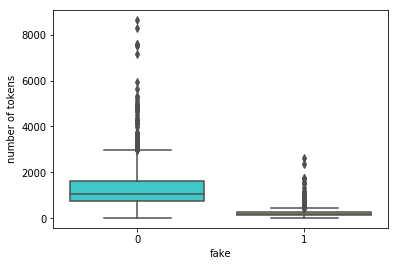

In [28]:
sns.boxplot(x="fake", y="number of tokens", data=df_completo,palette='rainbow')

### Análise das palavras mais frequentes do texto bruto normalizado

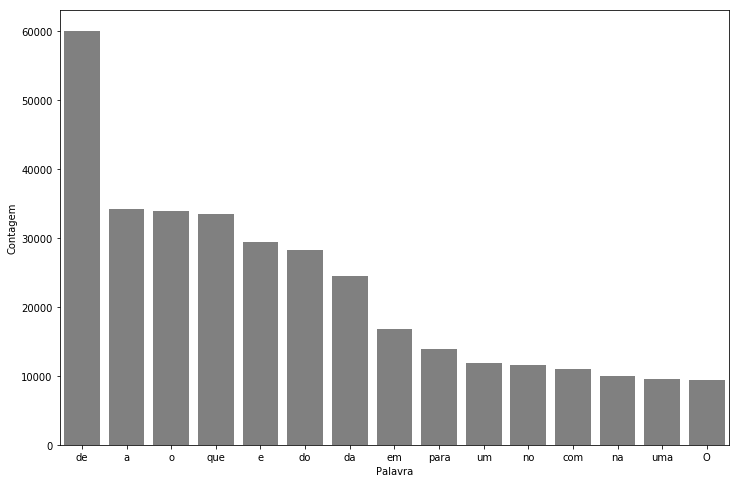

In [17]:
pareto(df_completo, "texto normalizado", 15)

### Análise do campo Emotiveness

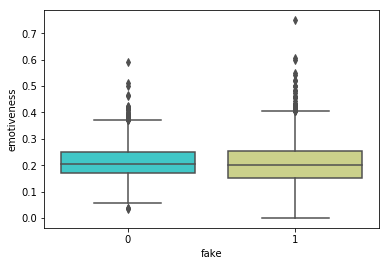

In [30]:
sns.boxplot(x="fake", y="emotiveness", data=df_completo,palette='rainbow')

### Análise do gráfico de pareto com a frequência dos tokens no texto pré-processado

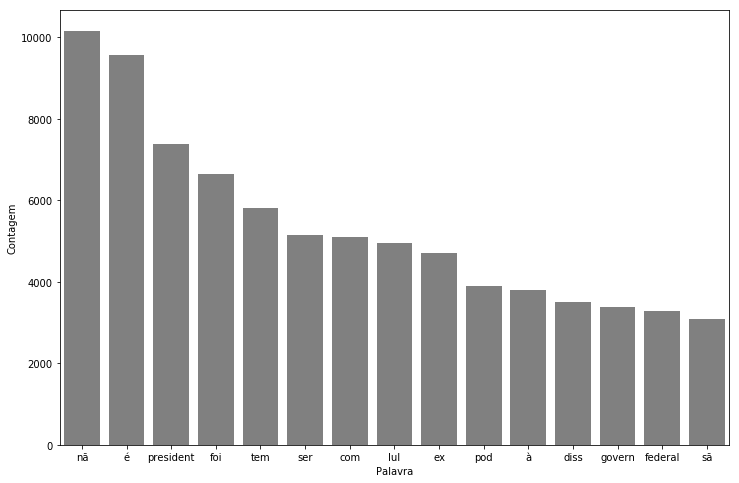

In [31]:
pareto(df_completo, "texto preprocessado2", 15)

## Feature engineering

### Criar campo ou feature com o número de tokens/palavras

In [23]:
df_completo['words'] = df_completo['texto normalizado'].apply(lambda x: len(x.split(' ')))

### Análise do novo campo - words

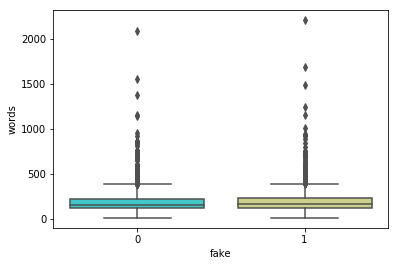

In [26]:
sns.boxplot(x="fake", y="words", data=df_completo,palette='rainbow')

### Criar campo ou feature com tamanho das sentenças

In [24]:
df_completo['length'] = df_completo['texto normalizado'].apply(lambda x: len(x))

### Análise do novo campo - length

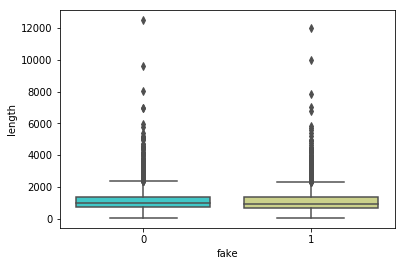

In [29]:
sns.boxplot(x="fake", y="length", data=df_completo,palette='rainbow')

## Pipeline de treinamento e avaliação das combinações

In [25]:
features= ['texto preprocessado2','emotiveness','words','length','number of tokens']

In [26]:
from sklearn.model_selection import train_test_split

### Divisão do conjunto de dados completo em treino e teste

80% para treino e 20% para testes

In [27]:
treino, teste, classe_treino, classe_teste = train_test_split(df_completo[features],
                                                              df_completo['fake'],
                                                              test_size=0.20,
                                                              random_state = 42,shuffle = True, stratify = df_completo['fake'])


In [60]:
teste.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1440 entries, 3060 to 6900
Data columns (total 5 columns):
texto preprocessado2    1440 non-null object
emotiveness             1440 non-null float64
words                   1440 non-null int64
length                  1440 non-null int64
number of tokens        1440 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 67.5+ KB


### Divisão do conjunto de dados de política em treino e teste

In [102]:
features_pol = ['texto preprocessado2','emotiveness','number of tokens']
treino_pol, teste_pol, classe_treino_pol, classe_teste_pol = train_test_split(df_politica[features_pol],
                                                              df_politica['fake'],
                                                              test_size=0.20,
                                                              random_state = 42,shuffle = True, stratify = df_politica['fake'])


## Avalição das combinações usando o classificador Regressão Logistica

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
regressao_logistica = LogisticRegression(solver = "lbfgs")

### Testes com pipeline que incluir texto (CountVectorizer e TFIDFTransform - Unigramas)

In [44]:
from sklearn.pipeline import FeatureUnion

In [48]:
text_pipe = Pipeline([
                ('selector', TextSelector(key='texto preprocessado2')),
                ('cv', CountVectorizer(ngram_range=(1,1))),
                ('tfidf', TfidfTransformer())
            ])

feats = FeatureUnion([('text', text_pipe), 
                     ])
pipe = Pipeline([
    ('features',feats),
    ('classificador', regressao_logistica)
])

classificar_texto(pipe,treino, classe_treino,0)

Accuracy: 0.8935763888888889
Precision: 0.8942608695652174
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      2880
           1       0.89      0.89      0.89      2880

   micro avg       0.89      0.89      0.89      5760
   macro avg       0.89      0.89      0.89      5760
weighted avg       0.89      0.89      0.89      5760

[[2576  304]
 [ 309 2571]]


### Testes com pipeline que incluir texto (CountVectorizer e TFIDFTransform - Unigramas e Bigramas)

In [49]:
text_pipe = Pipeline([
                ('selector', TextSelector(key='texto preprocessado2')),
                ('cv', CountVectorizer(ngram_range=(1,2))),
                ('tfidf', TfidfTransformer())
            ])

feats = FeatureUnion([('text', text_pipe), 
                     ])
pipe = Pipeline([
    ('features',feats),
    ('classificador', regressao_logistica)
])

classificar_texto(pipe,treino, classe_treino,0)

Accuracy: 0.8901041666666667
Precision: 0.8848920863309353
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      2880
           1       0.88      0.90      0.89      2880

   micro avg       0.89      0.89      0.89      5760
   macro avg       0.89      0.89      0.89      5760
weighted avg       0.89      0.89      0.89      5760

[[2544  336]
 [ 297 2583]]


### Testes com pipeline que incluir texto (CountVectorizer e TFIDFTransform - Unigramas) e features numéricas número de palavras e tamanho da sentença normalizado

In [37]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
tokens_pipe =  Pipeline([
                ('selector', NumberSelector(key='number of tokens')),
                ('standard', MinMaxScaler())
            ])

In [77]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
words_pipe =  Pipeline([
                ('selector', NumberSelector(key='words')),
                ('standard', MinMaxScaler())
            ])

In [66]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
length_pipe =  Pipeline([
                ('selector', NumberSelector(key='length')),
                ('standard', MinMaxScaler())
            ])

In [74]:
from sklearn.pipeline import FeatureUnion

text_pipe = Pipeline([
                ('selector', TextSelector(key='texto preprocessado2')),
                ('cv', CountVectorizer(ngram_range=(1,1))),
                ('tfidf', TfidfTransformer())
            ])

feats = FeatureUnion([('text', text_pipe), 
                      ('words', words_pipe),
                      ('length', length_pipe),
                     ])

pipe = Pipeline([
    ('features',feats),
    ('classificador', regressao_logistica)
])

classificar_texto(pipe,treino, classe_treino,0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMax

Accuracy: 0.8934027777777778
Precision: 0.8942240779401531
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      2880
           1       0.89      0.89      0.89      2880

   micro avg       0.89      0.89      0.89      5760
   macro avg       0.89      0.89      0.89      5760
weighted avg       0.89      0.89      0.89      5760

[[2576  304]
 [ 310 2570]]


In [81]:
from sklearn.pipeline import FeatureUnion

text_pipe = Pipeline([
                ('selector', TextSelector(key='texto preprocessado2')),
                ('cv', CountVectorizer(ngram_range=(1,1))),
                ('tfidf', TfidfTransformer())
            ])

feats = FeatureUnion([('text', text_pipe), 
                      ('ntokens', tokens_pipe)
                     ])

pipe = Pipeline([
    ('features',feats),
    ('classificador', regressao_logistica)
])

classificar_texto(pipe,treino, classe_treino,0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMax

Accuracy: 0.9605902777777777
Precision: 0.9370675453047776
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      2880
           1       0.94      0.99      0.96      2880

   micro avg       0.96      0.96      0.96      5760
   macro avg       0.96      0.96      0.96      5760
weighted avg       0.96      0.96      0.96      5760

[[2689  191]
 [  36 2844]]


### Testes com pipeline que incluir texto (CountVectorizer e TFIDFTransform - Unigramas) e feature numérica Emotiveness normalizado

In [82]:
regressao_logistica = LogisticRegression(solver = "lbfgs")
text_pipe = Pipeline([
                ('selector', TextSelector(key='texto preprocessado2')),
                ('cv', CountVectorizer(ngram_range=(1,1))),
                ('tfidf', TfidfTransformer())
            ])

from sklearn.preprocessing import StandardScaler, MinMaxScaler
emotiveness_pipe =  Pipeline([
                ('selector', NumberSelector(key='emotiveness')),
                ('standard', MinMaxScaler())
            ])

feats = FeatureUnion([('text', text_pipe),
                     ('emotiveness', emotiveness_pipe)
                     ])
pipe = Pipeline([
    ('features',feats),
    ('classificador', regressao_logistica)
])

classificar_texto(pipe,treino, classe_treino,0)

Accuracy: 0.8977430555555556
Precision: 0.90066456803078
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      2880
           1       0.90      0.89      0.90      2880

   micro avg       0.90      0.90      0.90      5760
   macro avg       0.90      0.90      0.90      5760
weighted avg       0.90      0.90      0.90      5760

[[2596  284]
 [ 305 2575]]


### Testes com pipeline que incluir texto (CountVectorizer e TFIDFTransform - Unigramas) e feature numérica Emotiveness normalizado

In [30]:
from sklearn.pipeline import FeatureUnion
text_pipe = Pipeline([
                ('selector', TextSelector(key='texto preprocessado2')),
                ('cv', CountVectorizer(ngram_range=(1,1))),
                ('tfidf', TfidfTransformer())
            ])

feats = FeatureUnion([('text', text_pipe),
                     ('emotiveness', emotiveness_pipe)
                     ])
pipe = Pipeline([
    ('features',feats),
    ('classificador', regressao_logistica)
])

classificar_texto(pipe,treino, classe_treino,0)

NameError: name 'emotiveness_pipe' is not defined

## Avalição das combinações usando o classificador SVM Linear SVC

In [31]:
from sklearn.svm import SVC,LinearSVC
svc = LinearSVC(random_state=0)

### Testes com pipeline que incluir texto (CountVectorizer e TFIDFTransform - Unigramas)

In [32]:
from sklearn.pipeline import FeatureUnion
text_pipe = Pipeline([
                ('selector', TextSelector(key='texto preprocessado2')),
                ('cv', CountVectorizer(ngram_range=(1,1))),
                ('tfidf', TfidfTransformer())
            ])

feats = FeatureUnion([('text', text_pipe)
                     ])

pipe = Pipeline([
    ('features',feats),
    ('classificador', svc),
])

classificar_texto(pipe,treino, classe_treino,0)

Accuracy: 0.9024305555555555
Precision: 0.9055283414975507
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      2880
           1       0.91      0.90      0.90      2880

   micro avg       0.90      0.90      0.90      5760
   macro avg       0.90      0.90      0.90      5760
weighted avg       0.90      0.90      0.90      5760

[[2610  270]
 [ 292 2588]]


### Testes com pipeline que incluir texto (CountVectorizer e TFIDFTransform - Unigramas e Bigramas)

In [33]:
text_pipe = Pipeline([
                ('selector', TextSelector(key='texto preprocessado2')),
                ('cv', CountVectorizer(ngram_range=(1,2))),
                ('tfidf', TfidfTransformer())
            ])

feats = FeatureUnion([('text', text_pipe)
                     ])

pipe = Pipeline([
    ('features',feats),
    ('classificador', svc),
])

classificar_texto(pipe,treino, classe_treino,0)

Accuracy: 0.9121527777777778
Precision: 0.9121527777777778
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      2880
           1       0.91      0.91      0.91      2880

   micro avg       0.91      0.91      0.91      5760
   macro avg       0.91      0.91      0.91      5760
weighted avg       0.91      0.91      0.91      5760

[[2627  253]
 [ 253 2627]]


### Testes com pipeline que incluir texto (CountVectorizer e TFIDFTransform - Unigramas e Bigramas) e a feature numérica emotiviness

In [34]:
text_pipe = Pipeline([
                ('selector', TextSelector(key='texto preprocessado2')),
                ('cv', CountVectorizer(ngram_range=(1,2))),
                ('tfidf', TfidfTransformer())
                    ])

from sklearn.preprocessing import MinMaxScaler
emotiveness_pipe =  Pipeline([
                ('selector', NumberSelector(key='emotiveness')),
                ('standard', MinMaxScaler())
            ])

feats = FeatureUnion([('text', text_pipe),
                      ('emotiveness', emotiveness_pipe)
                     ])

pipe = Pipeline([
    ('features',feats),
    ('classificador', svc),
])


classificar_texto(pipe,treino, classe_treino,0)

Accuracy: 0.9111111111111111
Precision: 0.9105409153952844
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      2880
           1       0.91      0.91      0.91      2880

   micro avg       0.91      0.91      0.91      5760
   macro avg       0.91      0.91      0.91      5760
weighted avg       0.91      0.91      0.91      5760

[[2622  258]
 [ 254 2626]]


In [35]:
svc

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

In [36]:
text_pipe.get_params()['cv']

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

### Teste Conjunto de dados com todas as categorias de noticias pipeline incluindo texto (unigrama e bigrama) e a feature numérica numéro de tokens

In [38]:
from sklearn.pipeline import FeatureUnion

text_pipe = Pipeline([
                ('selector', TextSelector(key='texto preprocessado2')),
                ('cv', CountVectorizer(ngram_range=(1,2))),
                ('tfidf', TfidfTransformer())
            ])

feats = FeatureUnion([('text', text_pipe), 
                      ('ntokens', tokens_pipe)
                     ])

pipe = Pipeline([
    ('features',feats),
    ('classificador', svc)
])

classificar_texto(pipe,treino, classe_treino,0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMax

Accuracy: 0.9611111111111111
Precision: 0.9348395546823838
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      2880
           1       0.93      0.99      0.96      2880

   micro avg       0.96      0.96      0.96      5760
   macro avg       0.96      0.96      0.96      5760
weighted avg       0.96      0.96      0.96      5760

[[2681  199]
 [  25 2855]]


## Avalição das combinações usando o classificador XGBoost

### Testes com pipeline que incluir texto (CountVectorizer e TFIDFTransform - Unigramas)

In [90]:
from xgboost import XGBClassifier
xbc = XGBClassifier(max_depth=4, n_estimators=300, learning_rate=0.1,subsample= 0.5)

In [91]:
text_pipe = Pipeline([
                ('selector', TextSelector(key='texto preprocessado2')),
                ('cv', CountVectorizer(ngram_range=(1,1))),
                ('tfidf', TfidfTransformer())
            ])

feats = FeatureUnion([('text', text_pipe)
                     ])

pipe = Pipeline([
    ('features',feats),
    ('classificador', xbc),
])

classificar_texto(pipe,treino, classe_treino,0)

Accuracy: 0.8883680555555555
Precision: 0.8882332523429365
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      2880
           1       0.89      0.89      0.89      2880

   micro avg       0.89      0.89      0.89      5760
   macro avg       0.89      0.89      0.89      5760
weighted avg       0.89      0.89      0.89      5760

[[2558  322]
 [ 321 2559]]


### Testes com pipeline que incluir texto (CountVectorizer e TFIDFTransform - Unigramas e Bigramas)

In [92]:
text_pipe = Pipeline([
                ('selector', TextSelector(key='texto preprocessado2')),
                ('cv', CountVectorizer(ngram_range=(1,2))),
                ('tfidf', TfidfTransformer())
            ])

feats = FeatureUnion([('text', text_pipe)
                     ])

pipe = Pipeline([
    ('features',feats),
    ('classificador', xbc),
])

classificar_texto(pipe,treino, classe_treino,0)

Accuracy: 0.8880208333333334
Precision: 0.8964171692089393
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      2880
           1       0.90      0.88      0.89      2880

   micro avg       0.89      0.89      0.89      5760
   macro avg       0.89      0.89      0.89      5760
weighted avg       0.89      0.89      0.89      5760

[[2588  292]
 [ 353 2527]]


### Teste Conjunto de dados com pipeline incluindo texto (unigramas e bigramas) e emotiveness

In [76]:
text_pipe = Pipeline([
                ('selector', TextSelector(key='texto preprocessado2')),
                ('cv', CountVectorizer(ngram_range=(1,2))),
                ('tfidf', TfidfTransformer())
                    ])

from sklearn.preprocessing import MinMaxScaler
emotiveness_pipe =  Pipeline([
                ('selector', NumberSelector(key='emotiveness')),
                ('standard', MinMaxScaler())
            ])

feats = FeatureUnion([('text', text_pipe),
                      ('emotiveness', emotiveness_pipe)
                     ])

pipe = Pipeline([
    ('features',feats),
    ('classificador', xbc)
])


classificar_texto(pipe,treino, classe_treino,0)

## Avalição das combinações usando o classificador Naive Bayes

In [97]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

### Testes com pipeline que incluir texto (CountVectorizer e TFIDFTransform - Unigramas)

In [98]:

text_pipe = Pipeline([
                ('selector', TextSelector(key='texto preprocessado2')),
                ('cv', CountVectorizer(ngram_range=(1,1))),
                ('tfidf', TfidfTransformer())
            ])

feats = FeatureUnion([('text', text_pipe)
                     ])

pipe = Pipeline([
    ('features',feats),
    ('classificador', nb)
])

classificar_texto(pipe,treino, classe_treino,0)

Accuracy: 0.8526041666666667
Precision: 0.865945945945946
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      2880
           1       0.87      0.83      0.85      2880

   micro avg       0.85      0.85      0.85      5760
   macro avg       0.85      0.85      0.85      5760
weighted avg       0.85      0.85      0.85      5760

[[2508  372]
 [ 477 2403]]


### Testes com pipeline que incluir texto (CountVectorizer e TFIDFTransform - Unigramas e Bigramas)

In [99]:

text_pipe = Pipeline([
                ('selector', TextSelector(key='texto preprocessado2')),
                ('cv', CountVectorizer(ngram_range=(1,2))),
                ('tfidf', TfidfTransformer())
            ])

feats = FeatureUnion([('text', text_pipe)
                     ])

pipe = Pipeline([
    ('features',feats),
    ('classificador', nb)
])

classificar_texto(pipe,treino, classe_treino,0)

Accuracy: 0.8664930555555556
Precision: 0.8876239441792141
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      2880
           1       0.89      0.84      0.86      2880

   micro avg       0.87      0.87      0.87      5760
   macro avg       0.87      0.87      0.87      5760
weighted avg       0.87      0.87      0.87      5760

[[2574  306]
 [ 463 2417]]


### Teste Conjunto de dados com pipeline incluindo texto (unigramas e bigramas) e emotiveness

In [100]:
text_pipe = Pipeline([
                ('selector', TextSelector(key='texto preprocessado2')),
                ('cv', CountVectorizer(ngram_range=(1,2))),
                ('tfidf', TfidfTransformer())
                    ])

from sklearn.preprocessing import MinMaxScaler
emotiveness_pipe =  Pipeline([
                ('selector', NumberSelector(key='emotiveness')),
                ('standard', MinMaxScaler())
            ])

feats = FeatureUnion([('text', text_pipe),
                      ('emotiveness', emotiveness_pipe)
                     ])

pipe = Pipeline([
    ('features',feats),
    ('classificador', nb)
])


classificar_texto(pipe,treino, classe_treino,0)

Accuracy: 0.8652777777777778
Precision: 0.8896296296296297
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      2880
           1       0.89      0.83      0.86      2880

   micro avg       0.87      0.87      0.87      5760
   macro avg       0.87      0.87      0.87      5760
weighted avg       0.87      0.87      0.87      5760

[[2582  298]
 [ 478 2402]]


## Grid Search CV para otimização do Linear SVC

In [41]:
from sklearn.svm import SVC,LinearSVC
svc = LinearSVC(random_state=0)
feats = FeatureUnion([('text', text_pipe)
                     ])
pipe = Pipeline([
    ('features',feats),
    ('classificador', svc)
])

In [42]:
from sklearn.model_selection import GridSearchCV

hyperparameters = { 'classificador__C':[0.01,1,10,100,1000],
                   'classificador__tol':[0.0001,0.001,0.01],
                   'classificador__loss':['hinge','squared_hinge']                  }
clf = GridSearchCV(pipe, hyperparameters, cv=5)

clf.fit(treino,classe_treino)

print(clf.best_params_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


{'classificador__C': 10, 'classificador__loss': 'hinge', 'classificador__tol': 0.0001}


In [43]:
print(clf.best_score_)

0.9126736111111111


## Utilizando os parâmetros ótimos, avaliar os resultados das previsões sobre o conjunto de testes ainda não explorado

In [44]:
svc = LinearSVC(random_state=0, C=10, loss='hinge', tol=0.0001)

feats = FeatureUnion([('text', text_pipe)
                     ])
pipe = Pipeline([
    ('features',feats),
    ('classificador', svc)
])

classificar_texto(pipe,treino, classe_treino,0)

Accuracy: 0.9138888888888889
Precision: 0.916491963661775
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      2880
           1       0.92      0.91      0.91      2880

   micro avg       0.91      0.91      0.91      5760
   macro avg       0.91      0.91      0.91      5760
weighted avg       0.91      0.91      0.91      5760

[[2641  239]
 [ 257 2623]]


In [45]:
preds = pipe.predict(teste)

In [46]:
print ("Accuracy:", accuracy_score(classe_teste, preds))
print ("Precision:", precision_score(classe_teste, preds))
print (classification_report(classe_teste, preds))
print (confusion_matrix(classe_teste, preds))

Accuracy: 0.9020833333333333
Precision: 0.9037656903765691
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       720
           1       0.90      0.90      0.90       720

   micro avg       0.90      0.90      0.90      1440
   macro avg       0.90      0.90      0.90      1440
weighted avg       0.90      0.90      0.90      1440

[[651  69]
 [ 72 648]]


In [54]:
svc

LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=0, tol=0.0001, verbose=0)

## Vizualização do Feature Importance

In [47]:
import matplotlib.pyplot as plt

def plot_coefficients(classifier, feature_names, top_features=20):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
#    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([ top_positive_coefficients])
    # create plot
    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(0, top_features), feature_names[top_coefficients],rotation=90)
    plt.xlabel('feature')
    plt.ylabel('coeficiente de importancia')
    plt.title('Feature importance')
    plt.show()

In [51]:
cv = text_pipe.get_params()['cv']
print(len(cv.vocabulary_))

321483


In [52]:
features = cv.get_feature_names()
features.append('emotiveness')

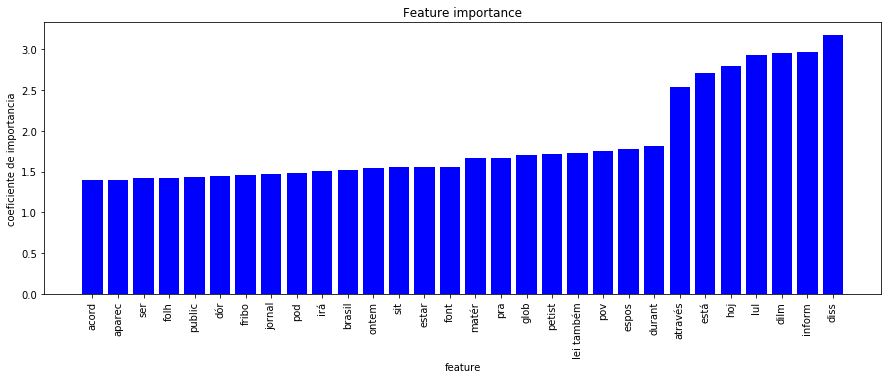

In [53]:
plot_coefficients(pipe.get_params()['classificador'], features,30)